# New Model testing 

# Libraries to import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [32]:
import numpy as np

# Import the dataset + clean it 

In [11]:
emotions_df = pd.read_csv("../raw_data/emotion_data.csv")

# Define the vectors

In [3]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 5

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['joy', 'worry', 'anger', 'sad', 'neutral']

# Clean data function

In [4]:
def clean_data(data):
    """
    clean and preprocess data
    """

    # Lowercase text
    data['clean_text'] = data['Text'].apply(
        lambda x: x.lower()
        )
    # Strip whitespace
    data['clean_text'] = data['clean_text'].apply(
        lambda x: x.strip()
        )
    # Remove numbers
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ''.join(let for let in x if not let.isdigit())
        )
    # Remove punctuation
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ''.join(let for let in x if not let in string.punctuation)
        )
    # Tokenization with nltk
    data['clean_text'] = data['clean_text'].apply(
        lambda x: word_tokenize(x)
    )
   
    #Lemmatizing with nltk
    lemmatizer = WordNetLemmatizer()
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x)
        )

    
    return data

In [15]:
clean_data(emotions_df)

,Emotion,Text,clean_text
0,sad,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on yo...
1,sad,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,joy,wants to hang out with friends SOON!,want to hang out with friend soon
3,worry,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah why didnt you go to prom ...
4,sad,"I should be sleep, but im not! thinking about ...",i should be sleep but im not thinking about an...
5,worry,Hmmm. http://www.djhero.com/ is down,hmmm httpwwwdjherocom is down
6,sad,@charviray Charlene my love. I miss you,charviray charlene my love i miss you
7,sad,@kelcouch I'm sorry at least it's Friday?,kelcouch im sorry at least it friday
8,worry,Choked on her retainers,choked on her retainer
9,sad,Ugh! I have to beat this stupid song to get to...,ugh i have to beat this stupid song to get to ...


# Split test and train data 

In [16]:
emotions_df

,Emotion,Text,clean_text
0,sad,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on yo...
1,sad,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,joy,wants to hang out with friends SOON!,want to hang out with friend soon
3,worry,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah why didnt you go to prom ...
4,sad,"I should be sleep, but im not! thinking about ...",i should be sleep but im not thinking about an...
5,worry,Hmmm. http://www.djhero.com/ is down,hmmm httpwwwdjherocom is down
6,sad,@charviray Charlene my love. I miss you,charviray charlene my love i miss you
7,sad,@kelcouch I'm sorry at least it's Friday?,kelcouch im sorry at least it friday
8,worry,Choked on her retainers,choked on her retainer
9,sad,Ugh! I have to beat this stupid song to get to...,ugh i have to beat this stupid song to get to ...


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [17]:
def split_train_test(df, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], 
                                                        df['Emotion'], 
                                                        test_size=test_size, 
                                                        random_state=15)
    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = split_train_test(emotions_df, test_size=0.3)

# Tokenization + fitting using keras + padding



In [21]:
from keras.preprocessing.text import Tokenizer

texts = emotions_df.clean_text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words)

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 51651


In [25]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[    0,     0,     0, ...,   165,   200,   235],
       [    0,     0,     0, ...,   502, 16762,   111],
       [    0,     0,     0, ...,    33,     2,   238],
       ...,
       [    0,     0,     0, ...,   721,   159,   151],
       [    0,     0,     0, ...,    92,     1,   111],
       [    0,     0,     0, ...,   268,  2522,   123]], dtype=int32)

# Encoding y_test & y_train

In [26]:
encoding = {
    'joy': 0,
    'worry': 1,
    'anger': 2,
    'sad': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [28]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# Embedding matrice

In [29]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [30]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [33]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(51652, 300)

In [34]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))


Words found in wiki vocab: 22754
New words found: 28897


# Create CNN pipeline

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense , Flatten , GlobalMaxPooling1D

In [37]:
# Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(vocab_size + 1,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [38]:
embedd_layer

In [40]:
# Convolution
kernel_size = 3
filters = 256
def cnn_model():
    model = Sequential()
    model.add(embedd_layer)
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = 'adam', 
                  metrics = ['accuracy'])
    return model

model = cnn_model()   
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          15495600  
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 256)          230656    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 15,793,333
Trainable params: 297,733
Non-trainable params: 15,495,600
_________________________________________________________________


# Training

In [41]:
batch_size = 256
epochs = 6

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_split = 0.3)

Epoch 1/6
118/118 [==============================] - 386s 3s/step - loss: 1.3274 - accuracy: 0.4473 - val_loss: 1.1924 - val_accuracy: 0.5229
Epoch 2/6
118/118 [==============================] - 196s 2s/step - loss: 1.0967 - accuracy: 0.5731 - val_loss: 1.1250 - val_accuracy: 0.5565
Epoch 3/6
118/118 [==============================] - 188s 2s/step - loss: 0.9566 - accuracy: 0.6387 - val_loss: 1.1549 - val_accuracy: 0.5457
Epoch 4/6
118/118 [==============================] - 188s 2s/step - loss: 0.8234 - accuracy: 0.6966 - val_loss: 1.2334 - val_accuracy: 0.5307
Epoch 5/6
118/118 [==============================] - 213s 2s/step - loss: 0.6763 - accuracy: 0.7613 - val_loss: 1.2891 - val_accuracy: 0.5370
Epoch 6/6
118/118 [==============================] - 213s 2s/step - loss: 0.5238 - accuracy: 0.8283 - val_loss: 1.3356 - val_accuracy: 0.5345


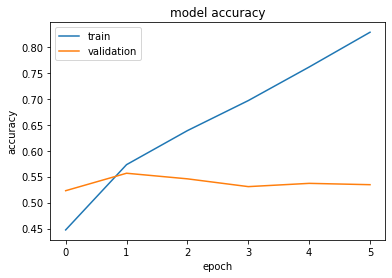

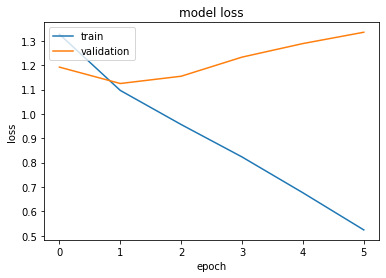

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
res = model.evaluate(X_test_pad, y_test, verbose=0)

In [46]:
res

[1.3394030332565308, 0.5352518558502197]